In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

## Part One

### 1. constuction of dataset

In [3]:
ID = [f"ID{num:03}" for num in range(800)]

In [4]:
Group = ["A" for _ in range(800//3)] \
        + ["B" for _ in range(800//3, 2*800//3)]\
        + ["C" for _ in range(2*800//3, 800)]

In [11]:
Feature_1 = np.random.normal(2500,300,800)

In [12]:
Feature_2 = np.random.normal(400,15,800)

In [13]:
Feature_3 = []
for i in range(800):
    if Group[i] == "A":
        Feature_3.append(3*Feature_1[i] - 5*Feature_2[i])
    if Group[i] == "B": 
        Feature_3.append(2*Feature_1[i])
    if Group[i] == "C":
        Feature_3.append(-Feature_1[i] + Feature_2[i])

In [14]:
df = pd.DataFrame(data = {"ID": ID, "Group": Group, "Feature_1": Feature_1,
                        "Feature_2": Feature_2, "Feature_3": Feature_3})

### 2. Questions

#### a,b. 
Based on the theoretical distribution of Feature 1 (which I believe has a standard deviation of 300 due to the 68,95,99.7 rule), I believe that $\textbf{38}$ samples have a value greater than 3000.

In actuallity, $\textbf{42}$ samples had a value greater than 3000. (This value might change depending on the random seem)

Below, I calculate this value theoretically and emperically.

In [17]:
(1 - norm.cdf(3000, 2500, 300))*800

38.23228181825176

In [18]:
sum([i > 3000 for i in Feature_1])

42

#### c.

In [19]:
for group in ["A","B","C"]:
    mean = df[df["Group"] == group]["Feature_3"].mean()
    sd = df[df["Group"] == group]["Feature_3"].std()
    print(f"Feature_3, Group {group} has mean {mean}, and standard deviation {sd}")

Feature_3, Group A has mean 5469.453312605532, and standard deviation 913.3895130187302
Feature_3, Group B has mean 5005.373806302949, and standard deviation 589.2669025965139
Feature_3, Group C has mean -2106.590668502451, and standard deviation 300.86894336139204


### 3. Scatterplot of `Feature_3` vs. `Feature_1`

In [21]:
d = {"A": 0, "B": 1, "C": 2}
colors = [d[letter] for letter in df["Group"]]


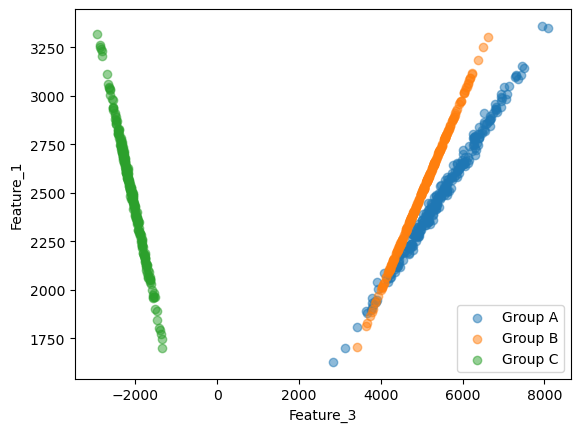

In [22]:

for letter in ["A","B","C"]:
    plt.scatter(df[df["Group"] == letter]["Feature_3"], 
                df[df["Group"] == letter]["Feature_1"], 
                label = f"Group {letter}", alpha = 0.5)

plt.xlabel("Feature_3")
plt.ylabel("Feature_1")
plt.legend()
plt.show()

### 4. Write to csv file

In [23]:
df.to_csv("fake_data.csv", index = False)